# **Exploratory Data Analysis** / EDA



● Ask meaningful questions about the dataset before analysis.

● Explore the data structure, including variables and data types.

● Identify trends, patterns and anomalies within the data.

● Test hypotheses and validate assumptions using statistics and visualization.

● Detect potential data issues or problems to address in further analysis.

# **Meaningful Questions Before Analysis**


How many Movies vs TV Shows are on Netflix?

Which countries contribute the most content?

How has the number of releases changed over time?

What are the most common ratings (e.g., TV-MA, PG)?

What are the top genres (listed_in)?

Are there missing values in key fields like director, cast, or country?

What’s the typical duration of movies and TV shows?

# **DATA UNDERSTANDING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Data Structure & Cleaning**

In [4]:
# Check missing values
missing_values = df.isnull().sum()
missing_values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [6]:
df['date_added']

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


In [7]:
# Split duration into numeric and unit
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('(min|Season|Seasons)')

In [8]:
df['duration_num']

,duration_num
0,90.0
1,2.0
2,1.0
3,1.0
4,2.0
...,...
8802,158.0
8803,2.0
8804,88.0
8805,88.0


In [9]:
df['duration_unit']

,duration_unit
0,min
1,Season
2,Season
3,Season
4,Season
...,...
8802,min
8803,Season
8804,min
8805,min


In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Season


# **Trends, Patterns, Anomalies**

Inspect missing data

Explore Movies vs TV Shows

Show release trends over years

Analyze top countries, ratings, and genres

Examine movie duration distribution

Plot a missing values heatmap

# Step 2: Movies vs TV Shows


/tmp/ipython-input-2079230511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


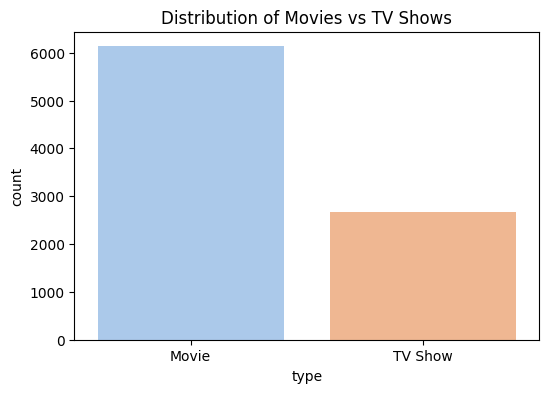

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

#Step 3: Releases Over Time

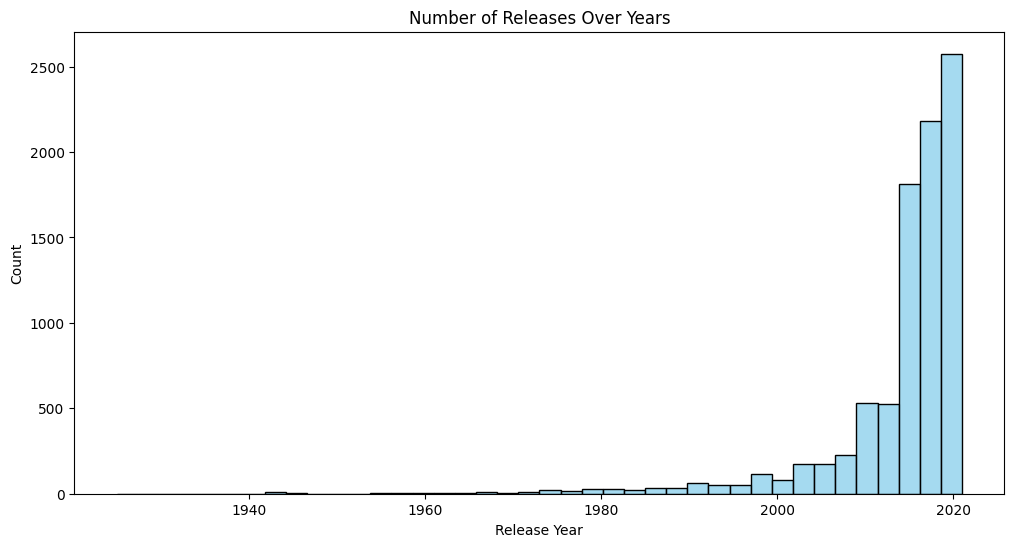

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=40, kde=False, color='skyblue')
plt.title('Number of Releases Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


# Step 4: Top Countries


/tmp/ipython-input-3567301608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')


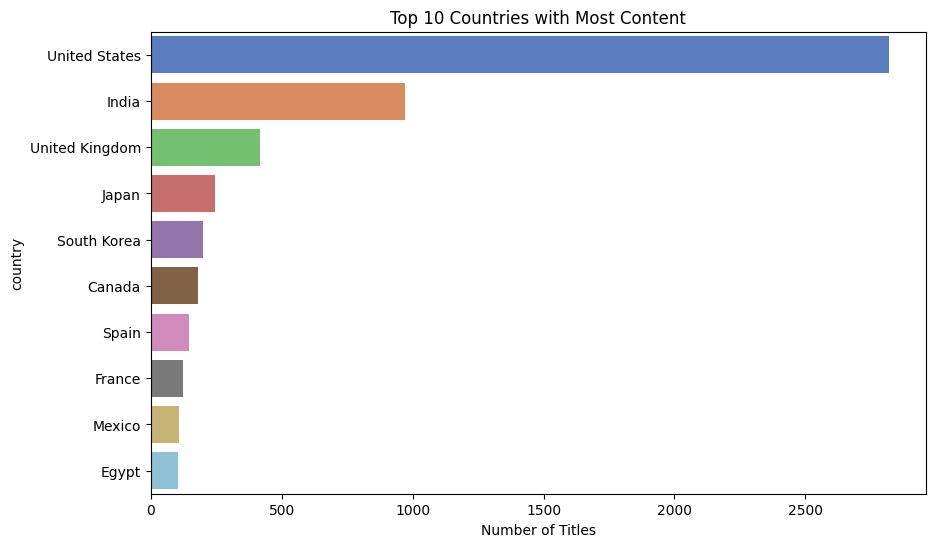

In [13]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.show()

# Step 5: Ratings Distribution


/tmp/ipython-input-1811337644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')


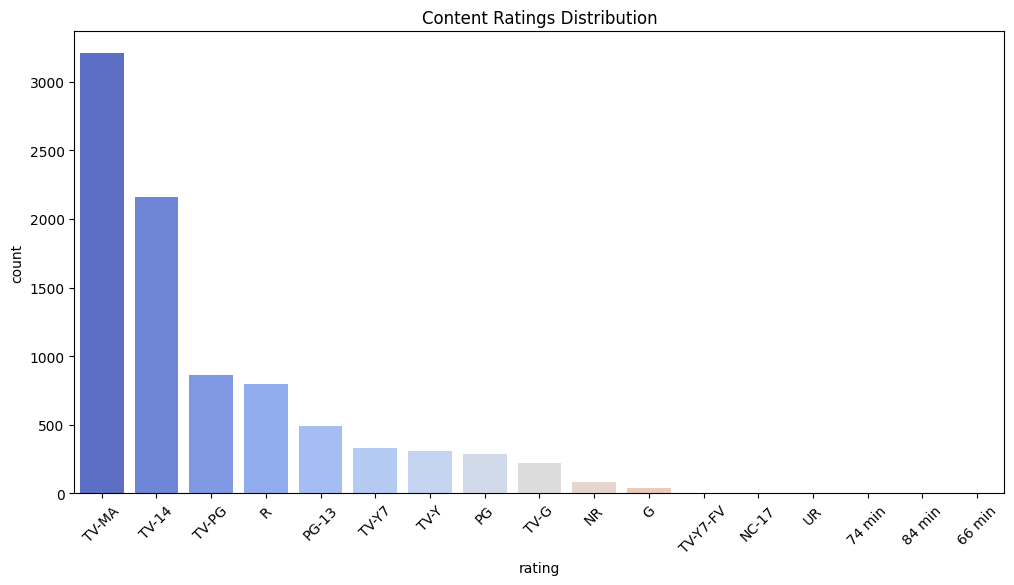

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Content Ratings Distribution')
plt.xticks(rotation=45)
plt.show()

# Step 6: Genre Analysis

In [15]:
from collections import Counter
genre_list = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([g for sublist in genre_list for g in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

/tmp/ipython-input-4120441867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


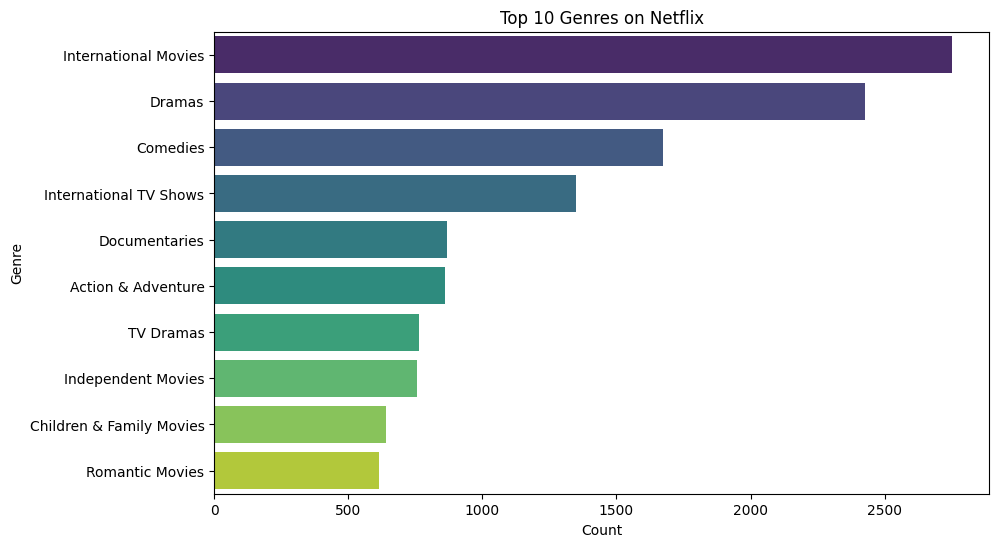

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.show()

# Step 7: Movie Duration Analysis

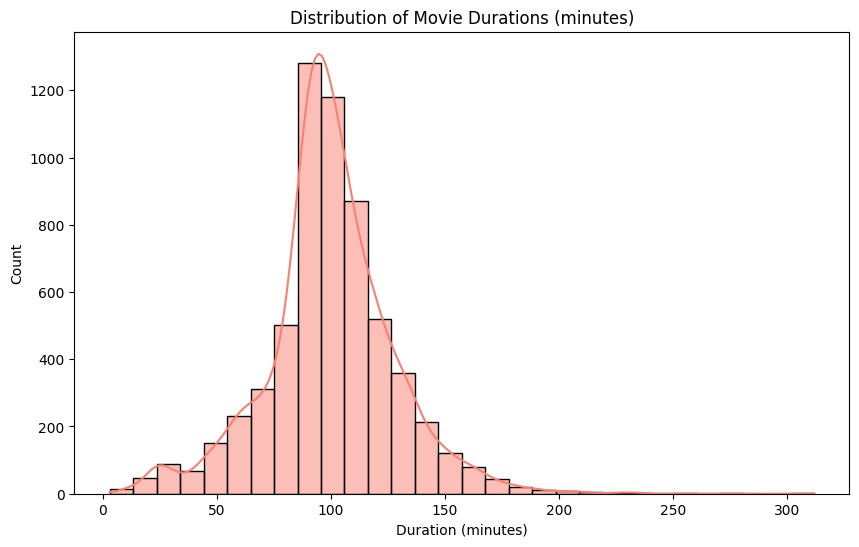

In [17]:
movie_durations = df[df['type']=='Movie']['duration_num'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(movie_durations, bins=30, color='salmon', kde=True)
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Step 8: Missing Data Heatmap


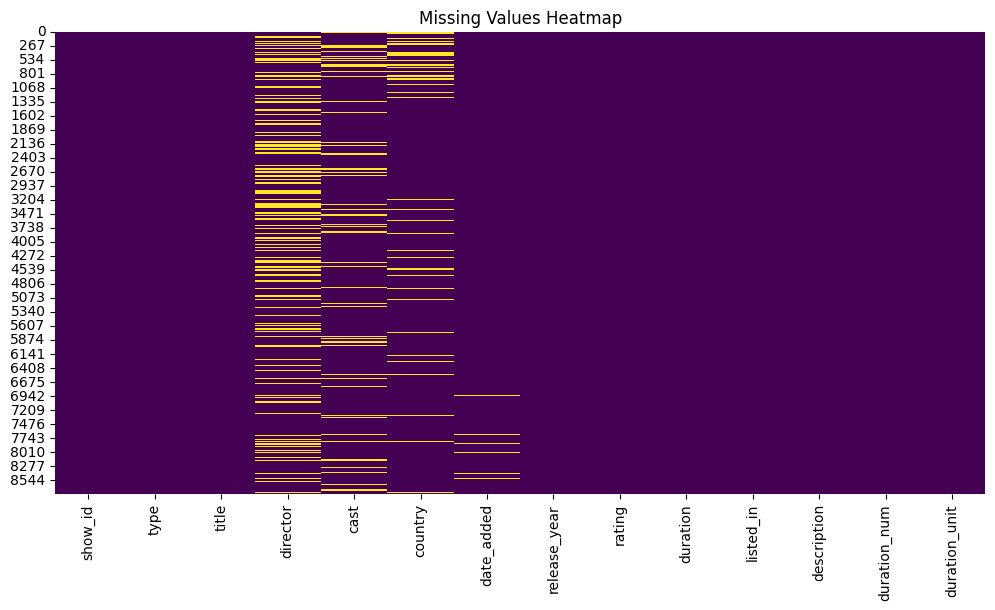

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# **Statistical Analysis**

Statistical test results in text (chi-square, t-test, proportions).

Bar chart for Movies vs TV Shows by year.

Pie chart for country share.

Bar chart for ratings proportions.

Histogram with range markers (90–120 min) for movie durations.

Hypothesis 1 - Chi-square Test for TV Shows vs Movies over years
Chi2 = 75.15, p-value = 0.00000
✅ Significant difference: Content type distribution has changed over years.


<Figure size 1200x600 with 0 Axes>

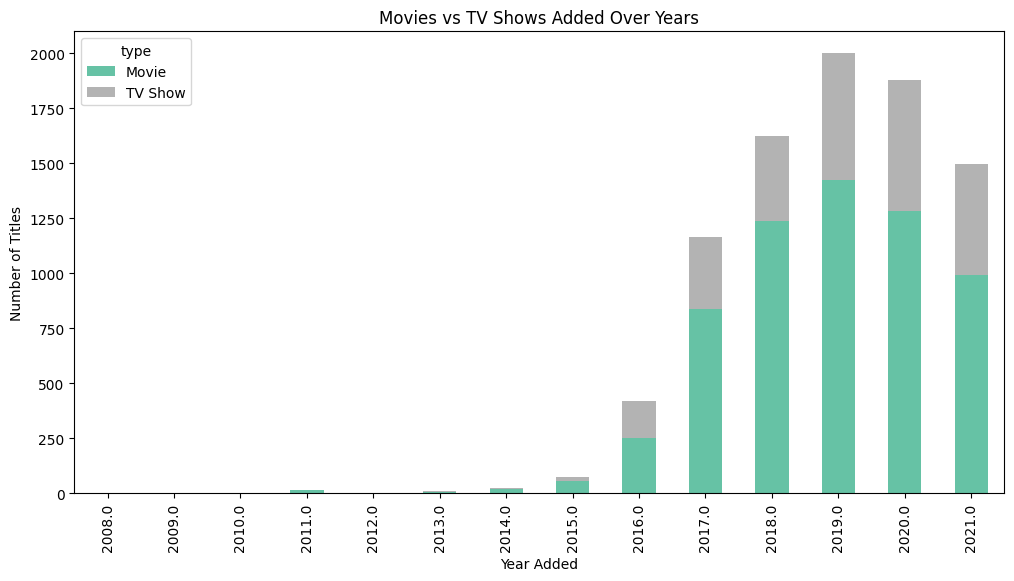


Hypothesis 2 - US share of content: 35.33 %
❌ US is not the majority contributor.


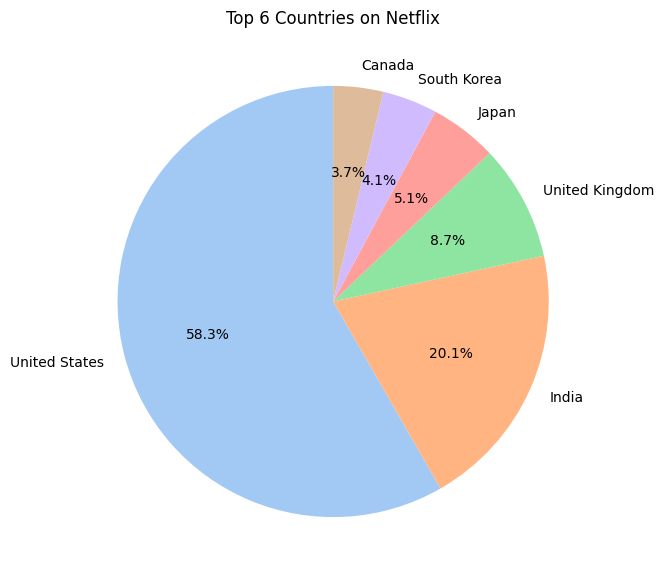


Hypothesis 3 - Most common rating: TV-MA
✅ Hypothesis confirmed: TV-MA dominates Netflix.


/tmp/ipython-input-3165182402.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")


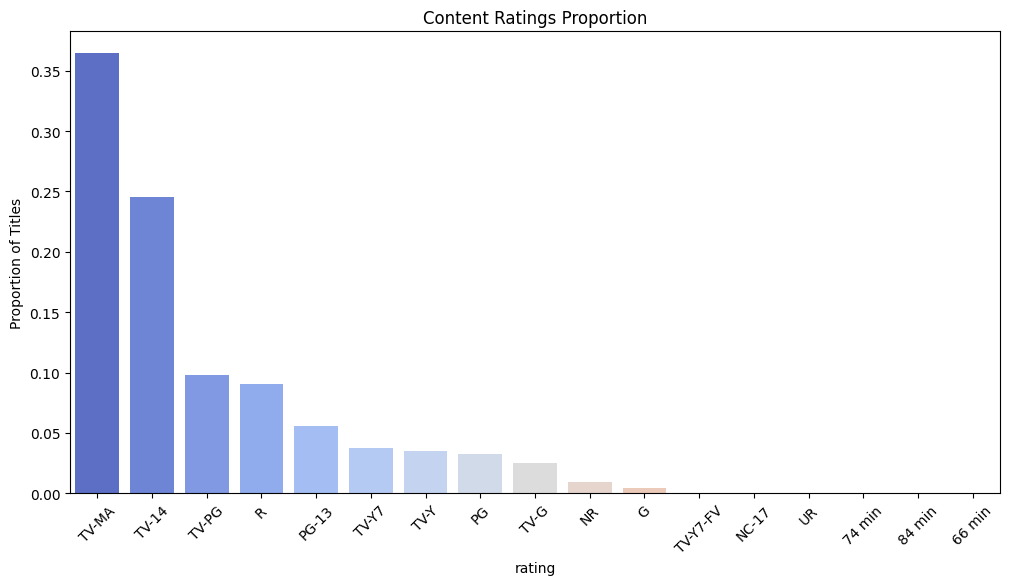


Hypothesis 4 - Average movie duration: 99.58 minutes
T-test: t=-15.01, p=0.00000
❌ Hypothesis not confirmed.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


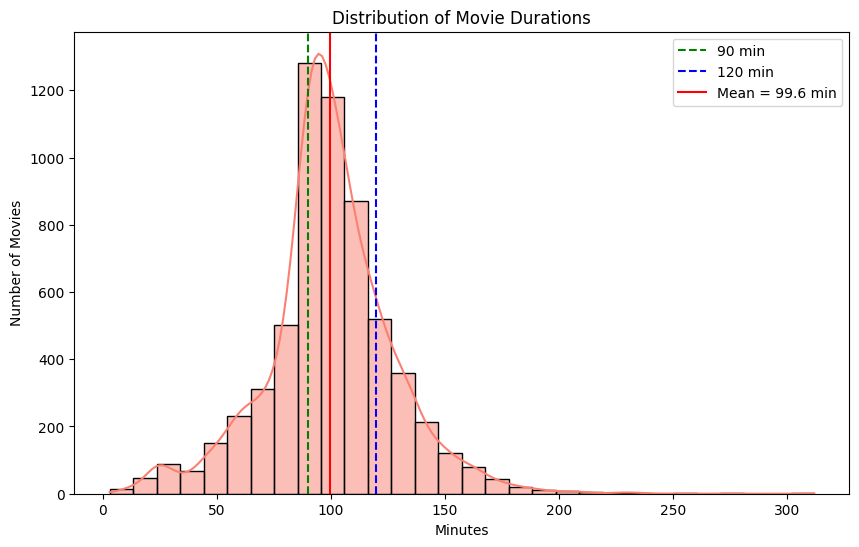

In [19]:
from scipy.stats import chi2_contingency, ttest_ind
import numpy as np

# ----------------------
# Hypothesis 1: Netflix has been adding more TV Shows in recent years
# ----------------------
df['year_added'] = df['date_added'].dt.year
recent_data = df.dropna(subset=['year_added'])
content_by_type_year = pd.crosstab(recent_data['year_added'], recent_data['type'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(content_by_type_year)
print("Hypothesis 1 - Chi-square Test for TV Shows vs Movies over years")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.5f}")
if p < 0.05:
    print("✅ Significant difference: Content type distribution has changed over years.")
else:
    print("❌ No significant change in content type distribution over years.")

# Visualization
plt.figure(figsize=(12,6))
content_by_type_year.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Movies vs TV Shows Added Over Years")
plt.ylabel("Number of Titles")
plt.xlabel("Year Added")
plt.show()


# ----------------------
# Hypothesis 2: Most Netflix content originates from the US
# ----------------------
country_counts = df['country'].value_counts(normalize=True)
us_share = country_counts.get('United States', 0)
print("\nHypothesis 2 - US share of content:", round(us_share*100, 2), "%")
if us_share > 0.5:
    print("✅ Majority of Netflix content is from the US.")
else:
    print("❌ US is not the majority contributor.")

# Visualization
plt.figure(figsize=(7,7))
df['country'].value_counts().head(6).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Top 6 Countries on Netflix")
plt.ylabel("")
plt.show()


# ----------------------
# Hypothesis 3: Ratings like TV-MA dominate Netflix
# ----------------------
rating_counts = df['rating'].value_counts(normalize=True)
top_rating = rating_counts.idxmax()
print("\nHypothesis 3 - Most common rating:", top_rating)
if top_rating == "TV-MA":
    print("✅ Hypothesis confirmed: TV-MA dominates Netflix.")
else:
    print("❌ Hypothesis not confirmed: Another rating is more common.")

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
plt.title("Content Ratings Proportion")
plt.xticks(rotation=45)
plt.ylabel("Proportion of Titles")
plt.show()


# ----------------------
# Hypothesis 4: Average movie duration is around 90–120 minutes
# ----------------------
movie_durations = df[df['type']=="Movie"]['duration_num'].dropna()
mean_duration = movie_durations.mean()

print("\nHypothesis 4 - Average movie duration:", round(mean_duration, 2), "minutes")

# Test vs expected mean (105 minutes)
t_stat, p_val = ttest_ind(movie_durations, np.full_like(movie_durations, 105))
print(f"T-test: t={t_stat:.2f}, p={p_val:.5f}")
if 90 <= mean_duration <= 120 and p_val > 0.05:
    print("✅ Hypothesis confirmed: Average duration is in the expected range.")
else:
    print("❌ Hypothesis not confirmed.")

# Visualization
plt.figure(figsize=(10,6))
sns.histplot(movie_durations, bins=30, kde=True, color="salmon")
plt.axvline(90, color="green", linestyle="--", label="90 min")
plt.axvline(120, color="blue", linestyle="--", label="120 min")
plt.axvline(mean_duration, color="red", linestyle="-", label=f"Mean = {round(mean_duration,1)} min")
plt.title("Distribution of Movie Durations")
plt.xlabel("Minutes")
plt.ylabel("Number of Movies")
plt.legend()
plt.show()


#Relationship Analysis

Country vs Rating → Which countries produce more mature vs family-friendly content?

Release Year vs Genre Trends → Which genres have become more common in recent years?

Type vs Duration → Movies vs TV Shows length comparison.

Correlation Heatmap (numeric features) → Even though most features are categorical, we can still check relations like release year & duration.

# Country vs Rating


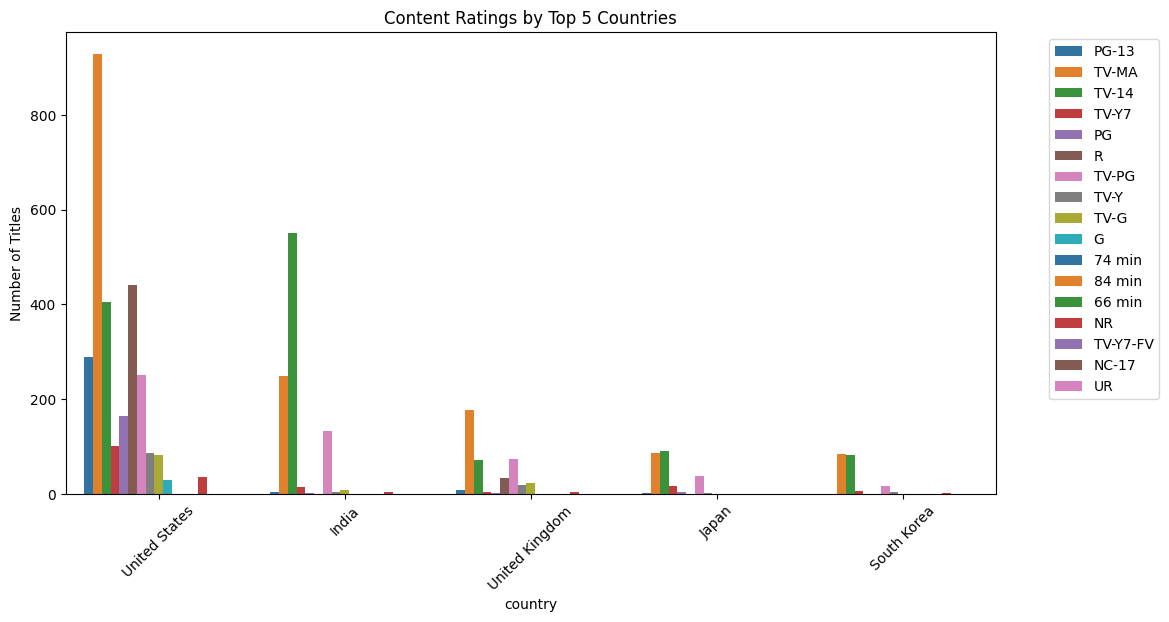

In [20]:
top_countries = df['country'].value_counts().head(5).index
subset = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x="country", hue="rating", order=top_countries, palette="tab10")
plt.title("Content Ratings by Top 5 Countries")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Release Year vs Genres


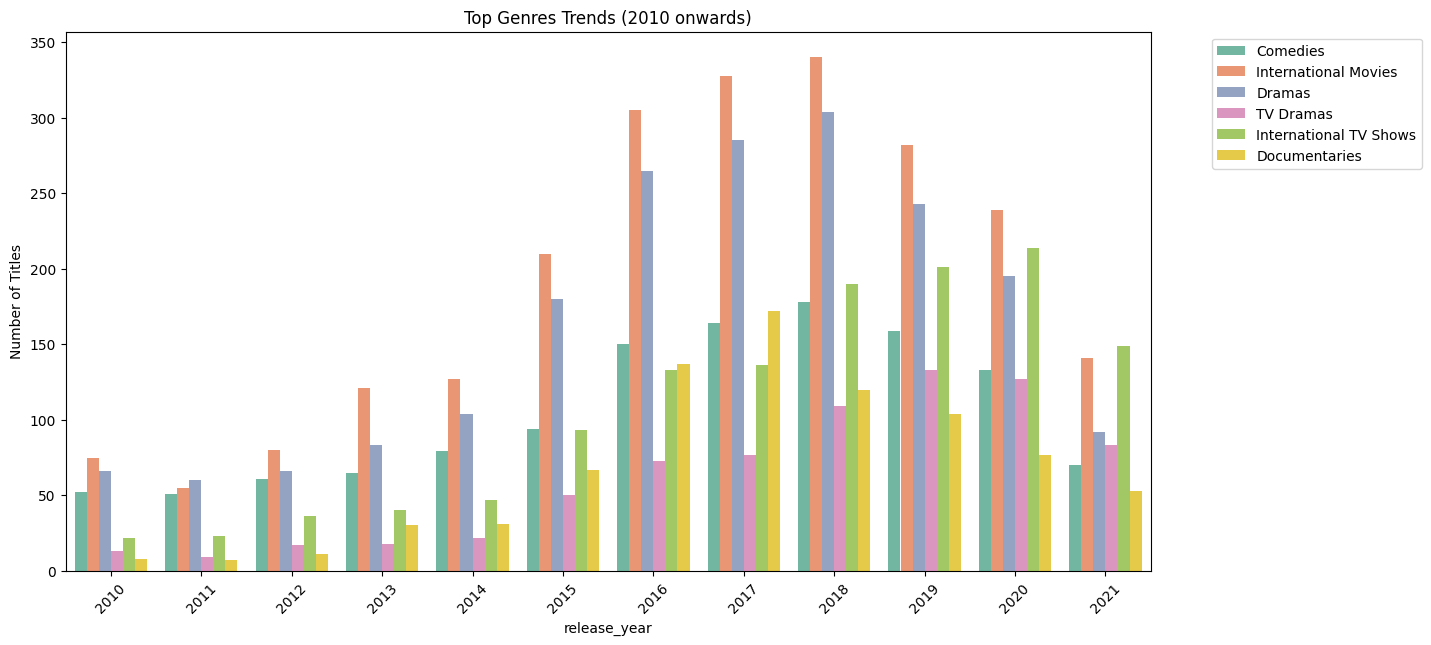

In [21]:
# ----------------------
# Explode genres into multiple rows
genres_exploded = df.dropna(subset=["listed_in"]).assign(
    genre=df["listed_in"].str.split(", ")
).explode("genre")

# Focus on last 10 years
recent_genres = genres_exploded[genres_exploded['release_year'] >= 2010]

top_genres = recent_genres['genre'].value_counts().head(6).index
recent_genres = recent_genres[recent_genres['genre'].isin(top_genres)]

plt.figure(figsize=(14,7))
sns.countplot(data=recent_genres, x="release_year", hue="genre", palette="Set2")
plt.title("Top Genres Trends (2010 onwards)")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Type vs Duration


/tmp/ipython-input-1889776720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['type']=="Movie"], x="type", y="duration_num", palette="pastel")


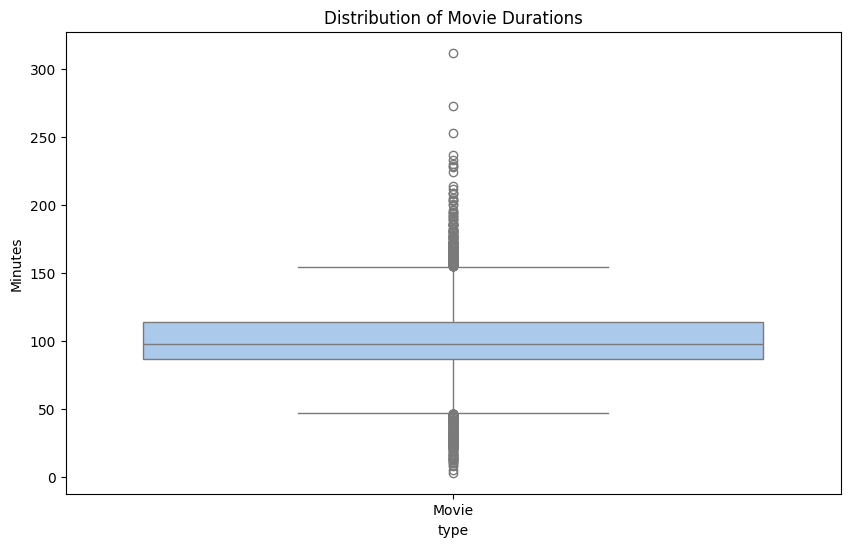

/tmp/ipython-input-1889776720.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tv_shows, x="duration_num", palette="muted")


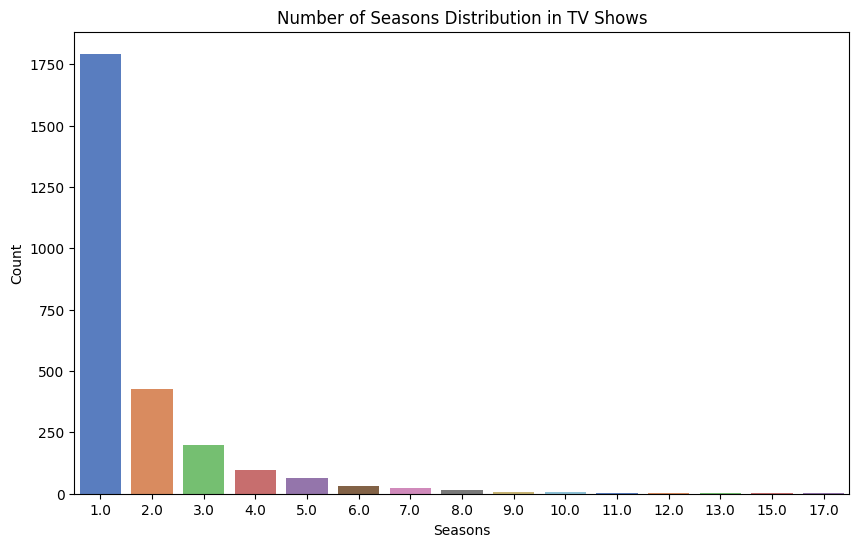

In [22]:
# ----------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['type']=="Movie"], x="type", y="duration_num", palette="pastel")
plt.title("Distribution of Movie Durations")
plt.ylabel("Minutes")
plt.show()

plt.figure(figsize=(10,6))
tv_shows = df[df['type']=="TV Show"]
sns.countplot(data=tv_shows, x="duration_num", palette="muted")
plt.title("Number of Seasons Distribution in TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()


# Correlation Heatmap


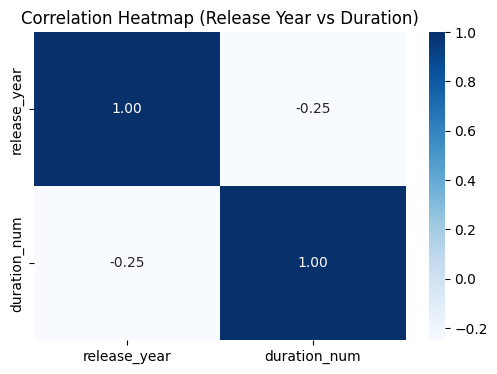

In [23]:
# ----------------------
numeric_df = df[['release_year', 'duration_num']].dropna()

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Release Year vs Duration)")
plt.show()